In [1]:
import pandas as pd
data=pd.read_csv('./loanGermanDataset.csv',index_col=False,names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'])
data.head(4)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,00100,3,+


In [2]:
display(data.info(),data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


None

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


Most of the features are categorical/Object data Type.
There appears to be no missing values in any column
but the A2 column contain numerical values ,still it has object data Type.
This is suspicious.

### Most of the columns contain missing values in the form of ? or may contain any extra special character

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13
### From The information about the Dataset

In [3]:
import numpy as np
data.replace('?',np.nan,inplace=True)
# we cannot remove the whole records
# data.A1.unique()
# data.loc[601,:]
# data.isnull().values.any()
# data['A1'].head(10)

In [4]:
# let us first check whether we have other than integers
# in A2 column
# data.A2.value_counts(ascending=True)
# data.A2.unique()
# this shows we have ? in our feauture at some data points
import numpy as np
data.A2.replace('?',np.nan,inplace=True)
data.A2.value_counts()
# data.A2.unique()


22.67    9
20.42    7
25.00    6
23.58    6
20.67    6
        ..
31.75    1
38.42    1
34.50    1
41.50    1
27.33    1
Name: A2, Length: 349, dtype: int64

In [5]:
# now converting the data type of A2 column
data['A2']=data['A2'].astype('float64')
# data.select_dtypes(include=['object'])
data.dtypes
# now let us impute the nan values in A2 after slight
# exploration of this feature


A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

count    690.000000
mean      31.514116
std       11.860245
min       13.750000
25%       22.670000
50%       28.460000
75%       37.707500
max       80.250000
Name: A2, dtype: float64

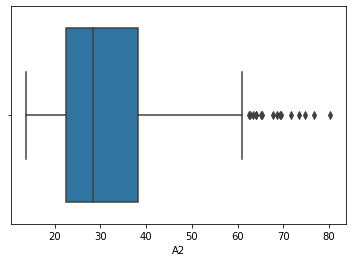

In [6]:

import seaborn as sns
sns.boxplot(x=data.A2)
# there are many outliers in the A2 feature
# data.A2.median() # median is 28.46
data.A2.fillna(28.46,inplace=True)
data.A2.describe()
# sns.barplot(y=data.A2,x=data.A16)
# data set is also balanced

In [7]:
data.A1.value_counts()
# data.A1.unique()
#  imputing the nan values with 'Missing' category
data.A1.fillna('Missing',inplace=True)
data.A1.isnull().values.any()
# Through this way, I have captured the meaning of data set


False

In [8]:
# imputing A4 feature
data.A4.fillna('Missing',inplace=True)
data.A4.value_counts()
# data.A4.unique()
# imputing A5 feature
data.A5.fillna('Missing',inplace=True)
data.A5.value_counts()
# imputing A6 feature
data.A6.fillna('Missing',inplace=True)
data.A6.value_counts()
# imputing A7 feature
data.A7.fillna('Missing',inplace=True)
data.A7.value_counts()

v          399
h          138
bb          59
ff          57
Missing      9
j            8
z            8
dd           6
n            4
o            2
Name: A7, dtype: int64

In [9]:
# for A14
data.A14.dtypes
data.A14=data.A14.astype('float64')
data.A14.median()
data.A14.fillna(160.0,inplace=True)
data.A14.value_counts()

0.0      132
160.0     47
120.0     35
200.0     35
100.0     30
        ... 
224.0      1
186.0      1
32.0       1
432.0      1
202.0      1
Name: A14, Length: 170, dtype: int64

In [10]:
data.isnull().values.any()

False

In [11]:
data.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [12]:

dummiesA1 = pd.get_dummies(data['A1'],drop_first=True,columns=['aA1','bA1'])
dummiesA1.rename(columns=lambda x:x+'1',inplace=True)
dummiesA4=pd.get_dummies(data['A4'],drop_first=True)
dummiesA4.rename(columns=lambda x:x+'4',inplace=True)
dummiesA5=pd.get_dummies(data['A5'],drop_first=True)
dummiesA5.rename(columns=lambda x:x+'5',inplace=True)
dummiesA7=pd.get_dummies(data['A7'],drop_first=True)
dummiesA7.rename(columns=lambda x:x+'7',inplace=True)

dummiesA9=pd.get_dummies(data['A9'],drop_first=True)
dummiesA9.rename(columns=lambda x:x+'9',inplace=True)
dummiesA10=pd.get_dummies(data['A10'],drop_first=True)
dummiesA10.rename(columns=lambda x:x+'10',inplace=True)
dummiesA12=pd.get_dummies(data['A12'],drop_first=True)
dummiesA12.rename(columns=lambda x:x+'12',inplace=True)
dummiesA13=pd.get_dummies(data['A13'],drop_first=True)
dummiesA13.rename(columns=lambda x:x+'13',inplace=True)
# dummiesA4.head(4)
# A6 has many categories
data.A6.value_counts()
# we cannot ignore some categorical values as our data set is small
dummiesA6=pd.get_dummies(data['A6'],drop_first=True)
dummiesA6.rename(columns=lambda x:x+'6',inplace=True)
output=pd.get_dummies(data['A16'],drop_first=True)
output.rename(columns={'-':'OutputNegative'},inplace=True)
# replacing + -> 0 and - --> 1

data=pd.concat([data,dummiesA1,dummiesA4,dummiesA5,dummiesA6,dummiesA7,dummiesA9,dummiesA10,dummiesA12,dummiesA13,output],axis=1)
data.columns.unique()

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'a1', 'b1', 'l4', 'u4', 'y4', 'g5',
       'gg5', 'p5', 'aa6', 'c6', 'cc6', 'd6', 'e6', 'ff6', 'i6', 'j6', 'k6',
       'm6', 'q6', 'r6', 'w6', 'x6', 'bb7', 'dd7', 'ff7', 'h7', 'j7', 'n7',
       'o7', 'v7', 'z7', 't9', 't10', 't12', 'p13', 's13', 'OutputNegative'],
      dtype='object')

In [13]:
# data.A16.value_counts()
output=pd.get_dummies(data['A16'],drop_first=True)
output.rename(columns={'-':'OutputNegative'},inplace=True)
output

,OutputNegative
0,0
1,0
2,0
3,0
4,0
...,...
685,1
686,1
687,1
688,1


In [14]:
# data.columns.unique()
# data.columns.value_counts()
# data.info()

# it would be better if i drop all object type columns
# toDropCol=[]
# for i in data.columns:
#     if (data['{}'.format(i)].dtype=='O' ):
#         toDropCol.append(i)
# toDropCol
# data1=data.drop(toDropCol,axis=1)
# data1.info()

# let us try to do this in less lines
data2=data.drop([i for i in data.columns if data['{}'.format(i)].dtype=='O'],axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   A2              690 non-null    float64
 1   A3              690 non-null    float64
 2   A8              690 non-null    float64
 3   A11             690 non-null    int64  
 4   A14             690 non-null    float64
 5   A15             690 non-null    int64  
 6   a1              690 non-null    uint8  
 7   b1              690 non-null    uint8  
 8   l4              690 non-null    uint8  
 9   u4              690 non-null    uint8  
 10  y4              690 non-null    uint8  
 11  g5              690 non-null    uint8  
 12  gg5             690 non-null    uint8  
 13  p5              690 non-null    uint8  
 14  aa6             690 non-null    uint8  
 15  c6              690 non-null    uint8  
 16  cc6             690 non-null    uint8  
 17  d6              690 non-null    uin

# A little Data Exploration

In [15]:
# sns.heatmap(data1.corr(),annot=True)
corrMatrix=data2.corr()
corrMatrix['OutputNegative']


A2               -0.164086
A3               -0.206294
A8               -0.322475
A11              -0.406410
A14               0.100042
A15              -0.175657
a1               -0.028934
b1                0.013897
l4               -0.060221
u4               -0.169423
y4                0.188964
g5               -0.169423
gg5              -0.060221
p5                0.188964
aa6               0.054574
c6               -0.007639
cc6              -0.132708
d6                0.090776
e6               -0.044896
ff6               0.181588
i6                0.127762
j6                0.035365
k6                0.096879
m6                0.011598
q6               -0.150082
r6               -0.029485
w6               -0.045487
x6               -0.192945
bb7               0.013044
dd7               0.021031
ff7               0.183913
h7               -0.186643
j7                0.015240
n7               -0.008462
o7               -0.005975
v7                0.050350
z7               -0.066487
t

### A8,A11,t9,t10 are strongly Negatively correlated to OutputNegative
### ff7, ff6, p5, y4 are weekly positively correlated to OutputNegative 

In [16]:
# corrMatrix['A8']
# # shows strong correlation with A11 ,t9, ff7
# corrMatrix['A11']
# # shows strong correlation with t9, t10
corrMatrix['t9']
# # shows strong correlation with t10, ff7
# corrMatrix['t10']
# corrMatrix['y4']
# # shows very strong correlation with p5(y4==p5)
# corrMatrix['ff7']
# # shows ff7==ff6

A2                0.204434
A3                0.244317
A8                0.345689
A11               0.379532
A14              -0.065836
A15               0.090012
a1                0.026047
b1                0.000918
l4               -0.056478
u4                0.164424
y4               -0.138535
g5                0.164424
gg5              -0.056478
p5               -0.138535
aa6               0.018883
c6                0.002351
cc6               0.092659
d6               -0.081042
e6                0.029818
ff6              -0.171392
i6               -0.112775
j6               -0.029910
k6               -0.074115
m6                0.001512
q6                0.157537
r6                0.018983
w6                0.025166
x6                0.154150
bb7               0.042875
dd7              -0.035601
ff7              -0.177308
h7                0.187158
j7               -0.032134
n7               -0.041766
o7               -0.056478
v7               -0.045550
z7                0.076289
t

### we will not use ff7,p5 for model fitting 
we may use scatter plot to further strengthen our inferences about feature selection 

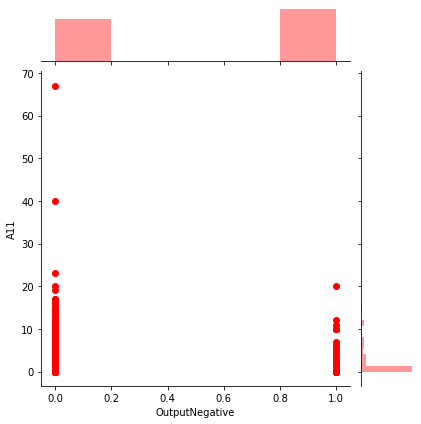

In [17]:
sns.jointplot(y='A11',x='OutputNegative',data=data2,kind='scatter',color='r')

### a little bit of scaling for continous features is required. Transformation is not needed i guess .Feature selection may be used .


### doing feature scaling of continous features

In [18]:
# data2.info()
cols=['A2','A3','A8','A11','A14','A15']
scaledData=data2.copy()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaledData[cols]=scaler.fit_transform(data2[cols])
# scaledData
scaledData.head(4)

,A2,A3,A8,A11,A14,A15,a1,b1,l4,u4,...,n7,o7,v7,z7,t9,t10,t12,p13,s13,OutputNegative
0,-0.057723,-0.956613,-0.291083,-0.288101,0.107155,-0.195413,0,1,0,1,...,0,0,1,0,1,1,0,0,0,0
1,2.291317,-0.060051,0.244190,0.740830,-0.816912,-0.087852,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,-0.591826,-0.856102,-0.216324,-0.493887,0.560471,-0.037144,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,-0.310853,-0.647038,0.456505,0.535044,-0.485643,-0.194837,0,1,0,1,...,0,0,1,0,1,1,1,0,0,0


In [20]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=35,random_state=21)
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,scaledData[['A11','t9','y4','ff6']],scaledData['OutputNegative'],cv=9)
score.mean()*100
# estimators=[10,50,100,150,200]
# Only the above features are relevant because rest are either not correlated to Output or redundant

84.04534062428799

In [21]:
# using knn classifier
from sklearn.neighbors import KNeighborsClassifier
# clf=KNeighborsClassifier()
neihbours=[3,4,5,8,10,15,12,20,25,30,40,50,80]
for i in neihbours:
    clf=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(clf,scaledData[cols],data['OutputNegative'],cv=9)
    print('the accuracy using {} is {} '.format(i,score.mean()))

the accuracy using 3 is 0.7593035619351408 
the accuracy using 4 is 0.74481658692185 
the accuracy using 5 is 0.7476836029467608 
the accuracy using 8 is 0.7331206804891015 
the accuracy using 10 is 0.7447216526163893 
the accuracy using 15 is 0.7301967038809143 
the accuracy using 12 is 0.7389496468443837 
the accuracy using 20 is 0.7418356497303865 
the accuracy using 25 is 0.741740715424926 
the accuracy using 30 is 0.7432786511733881 
the accuracy using 40 is 0.7389496468443837 
the accuracy using 50 is 0.7404116351484773 
the accuracy using 80 is 0.7186337054758107 


## i may try HyperOptisation technique some day on this data set or do something else
